In [1]:
import pandas as pd

# Load the dataset
file_path = 'Online retail.xlsx'
df = pd.read_excel(file_path)

# Display the first few rows of the dataset
df.head()


,"shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil"
0,"burgers,meatballs,eggs"
1,chutney
2,"turkey,avocado"
3,"mineral water,milk,energy bar,whole wheat rice..."
4,low fat yogurt


In [3]:
# Check the structure of the dataset
df.info()

# Display the first few rows again to confirm the structure
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 1 columns):
 #   Column                                                                                                                                                                                                                           Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                           --------------  ----- 
 0   shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil  7500 non-null   object
dtypes: object(1)
memory usage: 58.7+ KB


,"shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil"
0,"burgers,meatballs,eggs"
1,chutney
2,"turkey,avocado"
3,"mineral water,milk,energy bar,whole wheat rice..."
4,low fat yogurt


In [5]:
     # Split the transactions into individual items
transactions = df.iloc[:, 0].str.split(',')

# Convert transactions to a list of lists
transactions_list = transactions.tolist()

# Display the first few transactions to confirm the structure
transactions_list[:5]


[['burgers', 'meatballs', 'eggs'],
 ['chutney'],
 ['turkey', 'avocado'],
 ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea'],
 ['low fat yogurt']]

In [7]:
from mlxtend.preprocessing import TransactionEncoder

# Initialize the TransactionEncoder
te = TransactionEncoder()

# Transform the list of lists into an array format suitable for one-hot encoding
te_ary = te.fit(transactions_list).transform(transactions_list)

# Convert the array into a DataFrame
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# Display the first few rows of the encoded DataFrame
df_encoded.head()


,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [9]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Initialize the TransactionEncoder
te = TransactionEncoder()

# Transform the list of lists into an array format suitable for one-hot encoding
te_ary = te.fit(transactions_list).transform(transactions_list)

# Convert the array into a DataFrame
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# Display the first few rows of the encoded DataFrame
print(df_encoded.head())

# Apply the Apriori algorithm
frequent_itemsets = apriori(df_encoded, min_support=0.01, use_colnames=True)

# Generate the association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# Display the rules
print(rules.head())


    asparagus  almonds  antioxydant juice  asparagus  avocado  babies food  \
0       False    False              False      False    False        False   
1       False    False              False      False    False        False   
2       False    False              False      False     True        False   
3       False    False              False      False    False        False   
4       False    False              False      False    False        False   

   bacon  barbecue sauce  black tea  blueberries  ...  turkey  vegetables mix  \
0  False           False      False        False  ...   False           False   
1  False           False      False        False  ...   False           False   
2  False           False      False        False  ...    True           False   
3  False           False      False        False  ...   False           False   
4  False           False      False        False  ...   False           False   

   water spray  white wine  whole weat flour

In [36]:
import warnings
warnings.filterwarnings("ignore")


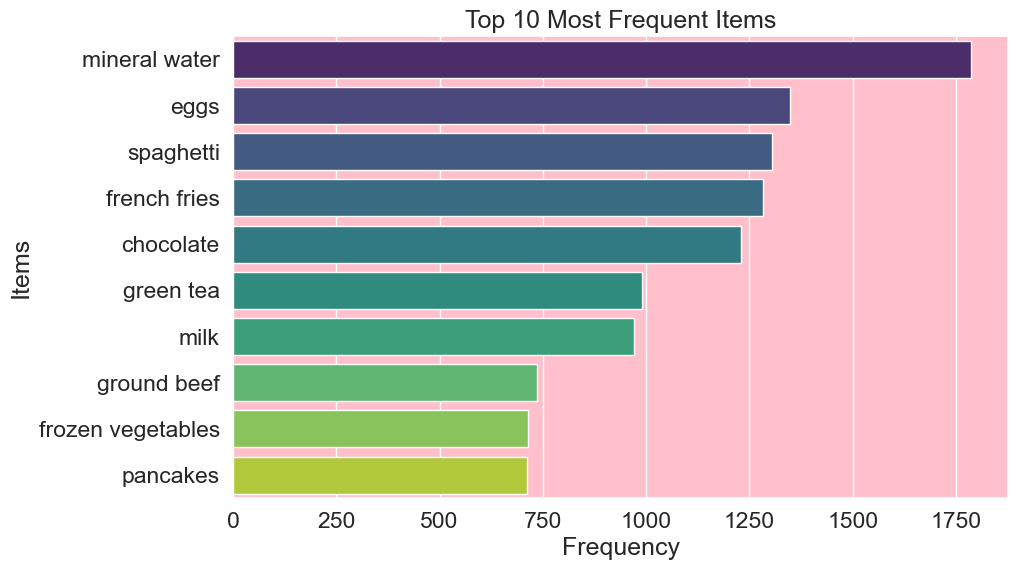

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sum the columns to get the frequency of each item
item_frequencies = df_encoded.sum().sort_values(ascending=False)

# Get the top 10 items
top_10_items = item_frequencies.head(10)

# Plot the top 10 items
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_items.values, y=top_10_items.index, palette='viridis')
plt.xlabel('Frequency')
plt.ylabel('Items')
plt.title('Top 10 Most Frequent Items')
plt.show()


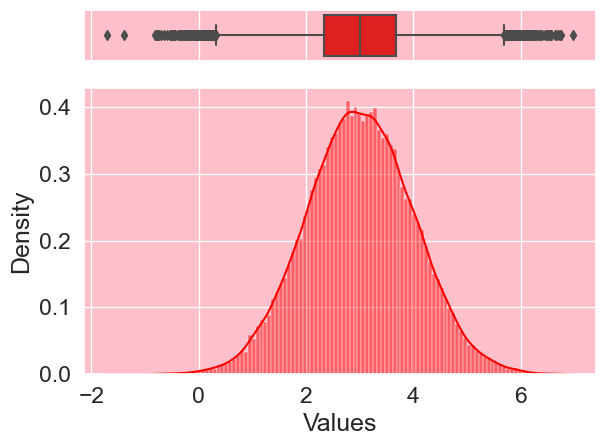

In [40]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

values = np.random.normal(loc=3.0, scale=1.0, size=50000)
df_FLIM = pd.DataFrame(values, columns=['Values'])

sns.set(font_scale=1.5, rc={'axes.facecolor': 'pink', 'figure.facecolor': 'white'})

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(data=df_FLIM, x="Values", ax=ax_box, color='red')
sns.histplot(data=df_FLIM, x="Values", ax=ax_hist, color='red', kde=True, stat='density')

ax_box.set(xlabel='')
plt.tight_layout()
plt.show()


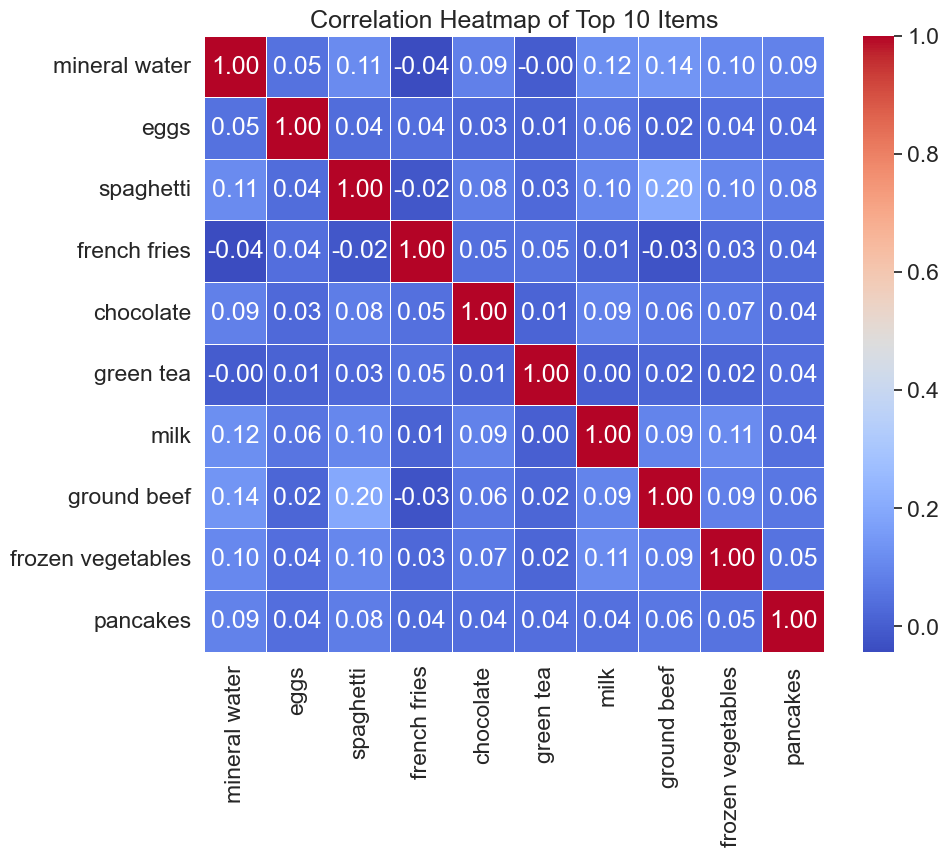

In [42]:
import numpy as np

# Get the top 10 items
top_10_items = item_frequencies.head(10).index

# Create a subset of the DataFrame with the top 10 items
df_top_10 = df_encoded[top_10_items]

# Create a correlation matrix
corr_matrix = df_top_10.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Top 10 Items')
plt.show()


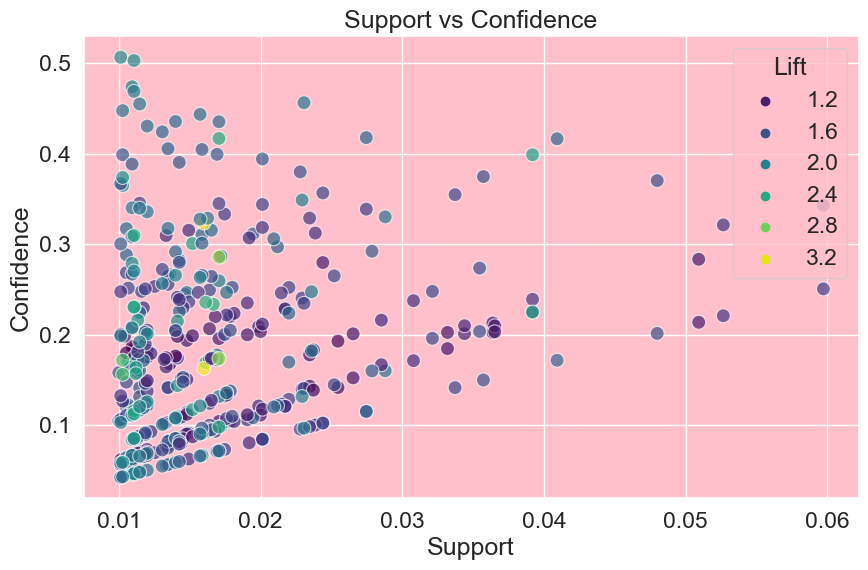

In [44]:
# Plot Support vs Confidence
plt.figure(figsize=(10, 6))
sns.scatterplot(x='support', y='confidence', data=rules, hue='lift', palette='viridis', s=100, edgecolor='w', alpha=0.7)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs Confidence')
plt.legend(title='Lift')
plt.show()


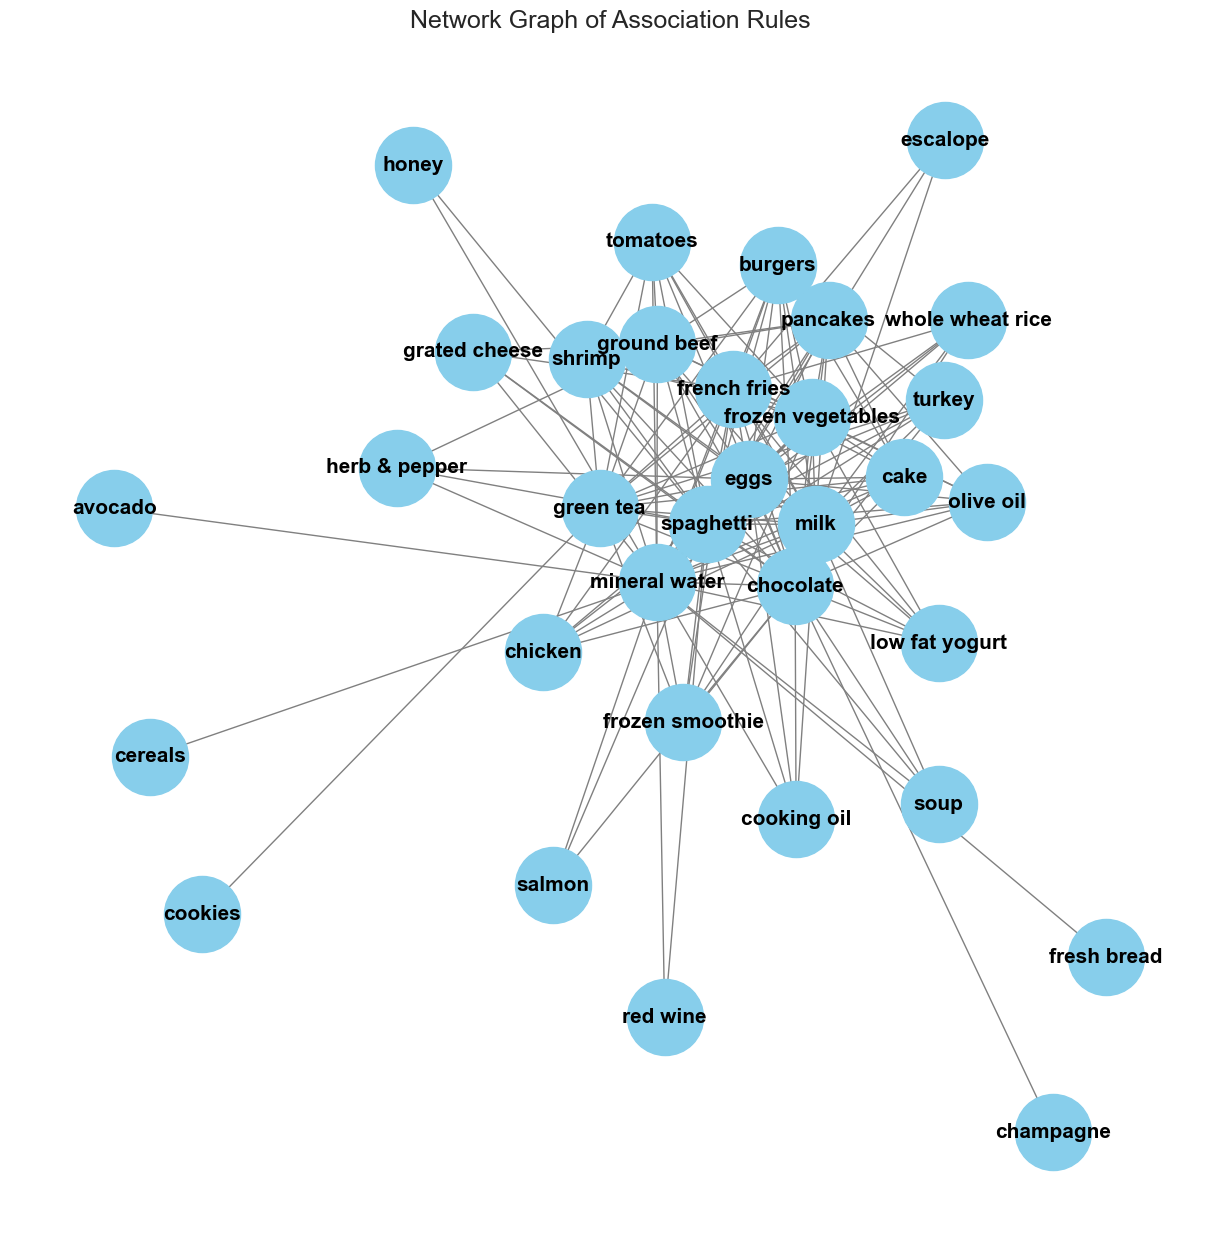

In [46]:
import networkx as nx

# Create a graph
G = nx.Graph()

# Add nodes and edges
for _, row in rules.iterrows():
    for item in row['antecedents']:
        G.add_node(item)
    for item in row['consequents']:
        G.add_node(item)
    G.add_edges_from([(i, j) for i in row['antecedents'] for j in row['consequents']])

# Plot the network graph
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, k=0.5)
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='skyblue', font_size=15, font_color='black', font_weight='bold', edge_color='grey')
plt.title('Network Graph of Association Rules')
plt.show()


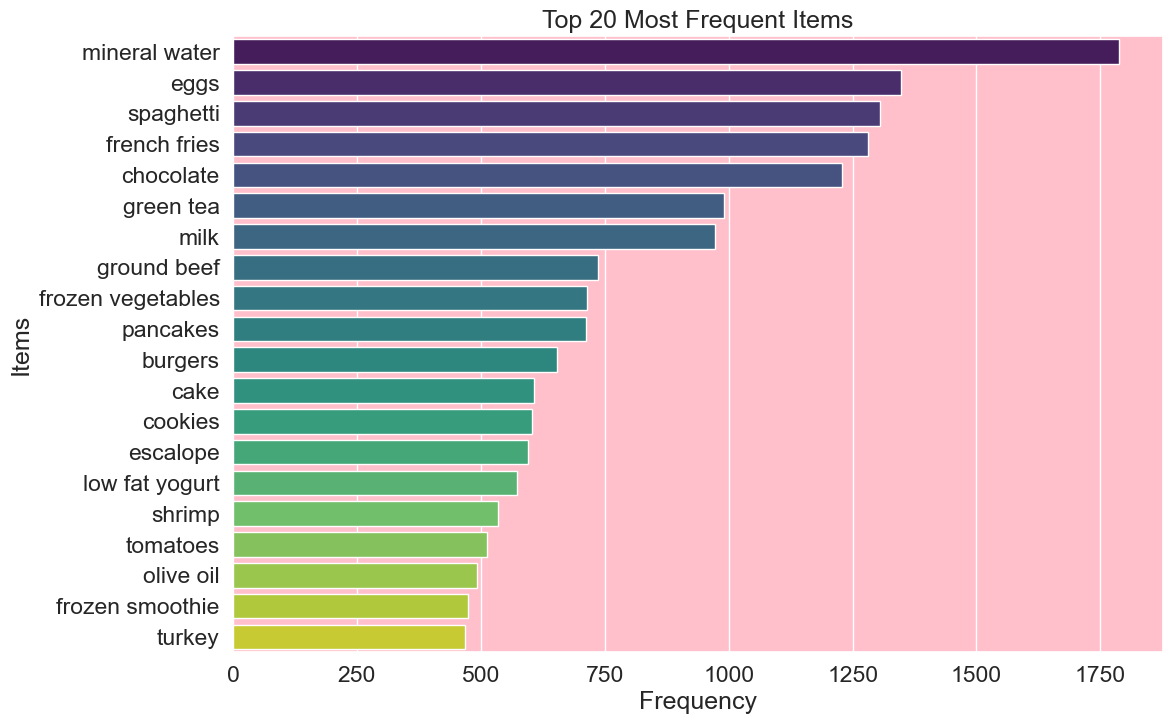

In [48]:
# Get the top 20 items
top_20_items = item_frequencies.head(20)

# Plot the top 20 items
plt.figure(figsize=(12, 8))
sns.barplot(x=top_20_items.values, y=top_20_items.index, palette='viridis')
plt.xlabel('Frequency')
plt.ylabel('Items')
plt.title('Top 20 Most Frequent Items')
plt.show()

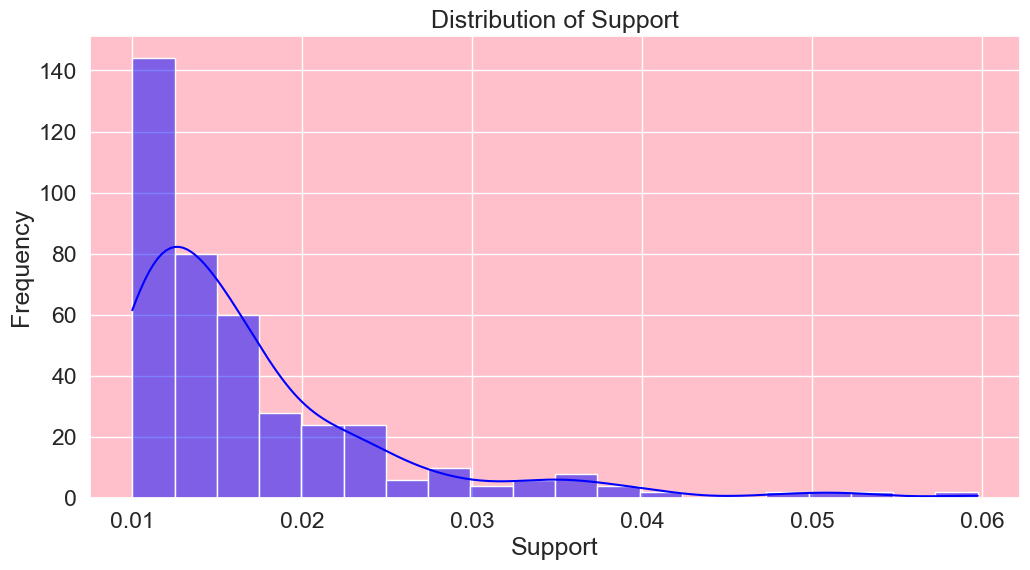

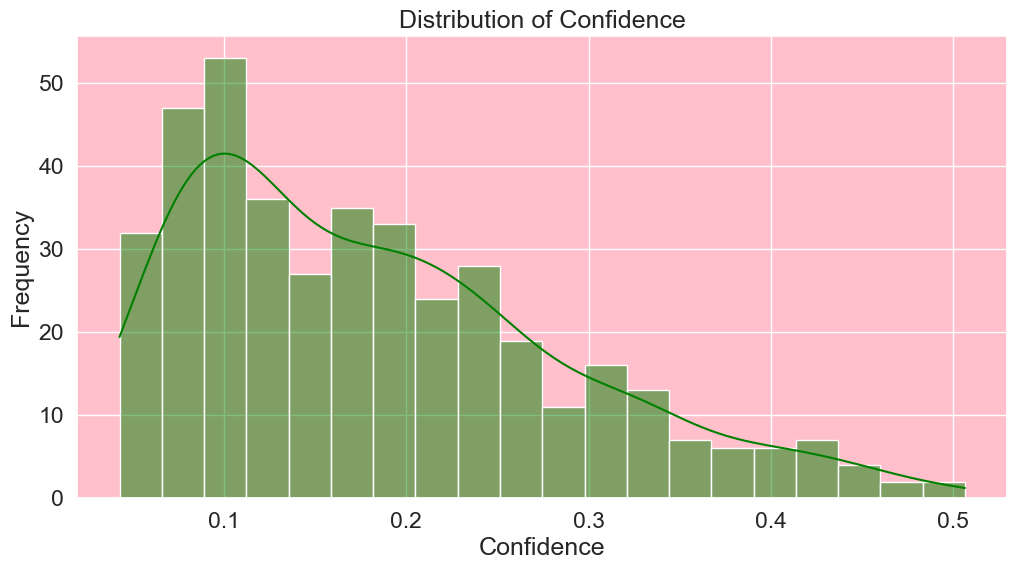

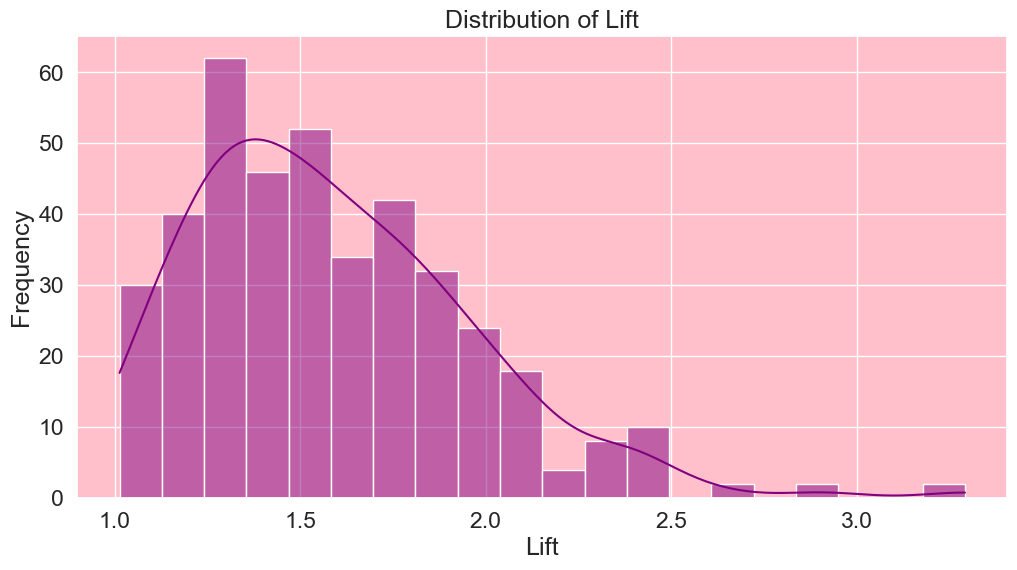

In [50]:
# Plot the distribution of support
plt.figure(figsize=(12, 6))
sns.histplot(rules['support'], kde=True, bins=20, color='blue')
plt.xlabel('Support')
plt.ylabel('Frequency')
plt.title('Distribution of Support')
plt.show()

# Plot the distribution of confidence
plt.figure(figsize=(12, 6))
sns.histplot(rules['confidence'], kde=True, bins=20, color='green')
plt.xlabel('Confidence')
plt.ylabel('Frequency')
plt.title('Distribution of Confidence')
plt.show()

# Plot the distribution of lift
plt.figure(figsize=(12, 6))
sns.histplot(rules['lift'], kde=True, bins=20, color='purple')
plt.xlabel('Lift')
plt.ylabel('Frequency')
plt.title('Distribution of Lift')
plt.show()


In [ ]:
# Interview Questions:
# 1. What is lift and why is it important in Association rules?
"""
# Lift and its Importance:
# - Lift measures how much more often items occur together than expected if they were statistically independent.
# - It's calculated as the ratio of the observed support to the expected support (if the items were independent).
# - Importance: Lift helps identify the strength of association between items. A lift > 1 indicates that the items are more likely to be bought together, making them good candidates for recommendations or bundling in retail.
"""

# 2. What is support and Confidence. How do you calculate them?
"""
# Support and Confidence:
# - Support: Measures the frequency of an itemset in the dataset. It indicates how frequently an itemset appears in the dataset.
#   Support = (Transactions containing itemset) / (Total transactions)
# - Confidence: Measures the reliability of the rule, i.e., how often items in the itemset A appear in transactions that contain itemset B.
#   Confidence(A -> B) = Support(A union B) / Support(A)
"""

# 3. What are some limitations or challenges of Association rules mining?
"""
# Limitations or Challenges of Association Rules Mining:
# - Computational Complexity: Generating association rules can be computationally expensive, especially with large datasets or complex itemsets.
# - High Dimensionality: As the number of items increases, the number of possible itemsets grows exponentially, leading to scalability issues.
# - Sparsity: In datasets with low support for itemsets, finding meaningful associations becomes challenging.
# - Interpretability: Generating a large number of rules may require manual effort to interpret and validate their relevance.
# - Quality of Rules: High support doesn't always guarantee meaningful rules, and high confidence rules may still be misleading if support is low.
"""
